#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/sahilkakkar/Downloads/Lead-Scoring-Case-Study/Leads.csv')
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Dropping Useless Columns (Reasons Mentioned)

In [5]:
print(df.shape)
print(len(df['Prospect ID'].unique()))
print(len(df['Lead Number'].unique()))
# The 'Prospect ID' and 'Lead Number' column are nothing but identifiers for rows, they do not add any information that could be used for analysis
# This shows that there are no duplicate Prospect ID or Lead Number

(9240, 37)
9240
9240


In [6]:
# We can drop the Prospect ID and Lead Number columns because they are merely identifiers and don't have any significant information for prediction
df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [7]:
list(df.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Tackling Missing Values

In [8]:
(df.isnull().sum()/len(df))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Our dataset not only has missing values such as NaN but it also has many values by the "Select" keyword which means the user didn't fill these values. These values should also count as missing values and therefore we will replace them with NaN. But before that, we would make all the strings lowercase so that we don't miss other variations of "Select" if any present.

In [9]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [10]:
df.replace('select', np.nan, inplace = True)

In [11]:
(df.isnull().sum()/len(df))  *100
# This is a more correct representation of the missing values in our dataset.

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Column: 'Lead Source' 

In [12]:
print(df['Lead Source'].value_counts(normalize = True, dropna = False) * 100)
# Only 0.38% of the values in this column are missing
# We can drop these values as they won't have any effect on our analysis as we have approximately 99.6% of the values.

google               31.093074
direct traffic       27.521645
olark chat           18.993506
organic search       12.489177
reference             5.779221
welingak website      1.536797
referral sites        1.352814
facebook              0.595238
NaN                   0.389610
bing                  0.064935
click2call            0.043290
press_release         0.021645
social media          0.021645
live chat             0.021645
youtubechannel        0.010823
testone               0.010823
pay per click ads     0.010823
welearnblog_home      0.010823
welearn               0.010823
blog                  0.010823
nc_edm                0.010823
Name: Lead Source, dtype: float64


In [13]:
df = df[df['Lead Source'].notna()]

Column: 'TotalVisits'

In [14]:
df['TotalVisits'].value_counts(normalize = True, dropna = False).sort_index() * 100
# This column is similar to the "Lead Source" column
# We can simply drop the rows which contain null values (which are less than 2%)

0.0      23.478922
1.0       4.291612
2.0      18.242069
3.0      14.189483
4.0      12.168622
5.0       8.507171
6.0       5.063016
7.0       3.357236
8.0       2.433724
9.0       1.781834
10.0      1.238592
11.0      0.934376
12.0      0.488918
13.0      0.521512
14.0      0.391134
15.0      0.195567
16.0      0.228162
17.0      0.173837
18.0      0.162973
19.0      0.097784
20.0      0.130378
21.0      0.065189
22.0      0.032595
23.0      0.065189
24.0      0.054324
25.0      0.054324
26.0      0.021730
27.0      0.054324
28.0      0.021730
29.0      0.021730
30.0      0.010865
32.0      0.010865
41.0      0.010865
42.0      0.010865
43.0      0.010865
54.0      0.010865
55.0      0.010865
74.0      0.010865
115.0     0.010865
141.0     0.010865
251.0     0.010865
NaN       1.412429
Name: TotalVisits, dtype: float64

In [15]:
df = df[df['TotalVisits'].notna()]

Column: 'Country' 

In [16]:
df.Country.value_counts(normalize = True, dropna = False) * 100
# 70% of the people are from Country "India" and the rest of the countries are below 1%
# 26.63% of the values are missing while "unknown" is 0.054% of the values
# This column doesn't have the necessary amount of variance needed to be conducive to our analysis and predictions since most of the values belong to one category "India"
# It would be wise to drop this column

india                   71.534053
NaN                     25.303064
united states            0.760414
united arab emirates     0.584086
singapore                0.264492
saudi arabia             0.231430
united kingdom           0.165307
australia                0.143266
qatar                    0.110205
bahrain                  0.077143
hong kong                0.077143
oman                     0.066123
france                   0.066123
unknown                  0.055102
kuwait                   0.044082
south africa             0.044082
canada                   0.044082
nigeria                  0.044082
germany                  0.044082
sweden                   0.033061
philippines              0.022041
uganda                   0.022041
italy                    0.022041
bangladesh               0.022041
netherlands              0.022041
asia/pacific region      0.022041
china                    0.022041
belgium                  0.022041
ghana                    0.022041
kenya         

In [17]:
df.drop('Country', axis=1, inplace = True)

Column: 'Specialization' 

In [18]:
df['Specialization'].value_counts(normalize = True, dropna = False) * 100
# 36% of the values in this column are not provided
# But these values aren't actually missing, they do have information hidden in them 
# There might be the case that the students didn't find the Specialization they were looking for,
# or they were just not sure at the moment to make a decision and decided to not make a decision
# So it would be wise to take these missing values as "unstated", that would be a more correct representation

NaN                                  36.169275
finance management                   10.568658
human resource management             9.224157
marketing management                  9.069870
operations management                 5.499229
business administration               4.397179
it projects management                4.033502
supply chain management               3.813092
banking, investment and insurance     3.691867
travel and tourism                    2.226141
media and advertising                 2.226141
international business                1.939608
healthcare management                 1.719198
e-commerce                            1.223275
hospitality management                1.223275
retail management                     1.102050
rural and agribusiness                0.804496
e-business                            0.628168
services excellence                   0.440820
Name: Specialization, dtype: float64

In [19]:
df['Specialization'].replace(np.nan, "unstated", inplace = True)

Column: 'How did you hear about X Education'

In [21]:
df['How did you hear about X Education'].value_counts(normalize = True, dropna = False) * 100
# 78% of the values in this column are missing
# This column has no useful information for us to get insights from
# We should drop this column

NaN                      78.091250
online search             8.904562
word of mouth             3.824113
student of someschool     3.416354
other                     2.049813
multiple sources          1.675116
advertisements            0.771435
social media              0.727353
email                     0.286533
sms                       0.253471
Name: How did you hear about X Education, dtype: float64

In [22]:
df.drop('How did you hear about X Education', axis = 1, inplace = True)

Column: 'What is your current occupation'

In [23]:
df['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100
# We should impute 'Unemployed' in the case of missing values in this case

unemployed              60.348248
NaN                     29.567996
working professional     7.460877
student                  2.270223
other                    0.165307
housewife                0.099184
businessman              0.088164
Name: What is your current occupation, dtype: float64

In [24]:
df['What is your current occupation'].replace(np.nan, "unemployed", inplace = True)

Column: 'What matters most to you in choosing a course'

In [26]:
df['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100
# 70% of the values say "better career prospects" while approximately 30% of the values are missing
# This column doesn't have the necessary amount of variance to be conducive to our analysis and making predictions
# It would be wise to drop this column

better career prospects      70.200573
NaN                          29.777386
flexibility & convenience     0.011020
other                         0.011020
Name: What matters most to you in choosing a course, dtype: float64

In [27]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

Column: 'Tags'

In [28]:
df['Tags'].value_counts(normalize = True, dropna = False) * 100
# 36% of the values in this column are missing
# Also, except the categories like "will revert after reading the email" and "ringing", all the other categories don't even represent more than 6% individually and they seem really erratic as well (for eg, 'invalid number' and 'wrong number given' are not that different from each other)
# This column doesn't seem to be helpful in our analysis. So it would be in our best interests to drop it.

NaN                                                  36.665197
will revert after reading the email                  22.217324
ringing                                              13.081331
interested in other courses                           5.609434
already a student                                     5.124532
closed by horizzon                                    3.317170
switched off                                          2.644920
busy                                                  2.038792
lost to eins                                          1.895526
not doing further education                           1.597972
interested  in full time mba                          1.278378
graduation in progress                                1.223275
invalid number                                        0.914701
diploma holder (not eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0

In [29]:
df.drop('Tags', axis=1, inplace = True)

Column: "Lead Quality"

In [30]:
df['Lead Quality'].value_counts(normalize = True, dropna = False) * 100
# 52% of the values in this column are missing
# While categories like "might be", "not sure" don't seem too different from each other, others don't represent more than 7% individually
# It would be wise to drop this column

NaN                  52.016751
might be             16.740137
not sure             11.968261
worst                 6.623319
high in relevance     6.524135
low in relevance      6.127397
Name: Lead Quality, dtype: float64

In [31]:
df.drop('Lead Quality', axis = 1, inplace = True)

Column: 'Lead Profile'

In [32]:
df['Lead Profile'].value_counts(normalize = True, dropna = False) * 100
# With 74% of the values missing, it would make sense to drop this column

NaN                            74.465506
potential lead                 17.125854
other leads                     5.311880
student of someschool           2.644920
lateral student                 0.231430
dual specialization student     0.220410
Name: Lead Profile, dtype: float64

In [33]:
df.drop('Lead Profile', axis = 1, inplace = True)

Column: 'City'

In [34]:
df['City'].value_counts(normalize = True, dropna = False) * 100
# 39% of the values are missing while 35% of the values say "mumbai"
# This column doesn't have the necessary amount of variance to contribute in predictions
# We are dropping this column

NaN                            39.398281
mumbai                         35.012123
thane & outskirts               8.210271
other cities                    7.493939
other cities of maharashtra     4.915142
other metro cities              4.154728
tier ii cities                  0.815517
Name: City, dtype: float64

In [35]:
df.drop('City', axis = 1, inplace = True)

Columns:
- 'Asymmetrique Activity Index'
- 'Asymmetrique Profile Index'
- 'Asymmetrique Activity Score'
- 'Asymmetrique Profile Score'

In [36]:
for col in ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']:
    print(col)
    print(str((df[col].isnull().sum()/len(df))*100) + '%')
    print()

# With more than 45% of the values missing in these 4 columns, they should be all be dropped.

Asymmetrique Activity Index
45.768128719418115%

Asymmetrique Profile Index
45.768128719418115%

Asymmetrique Activity Score
45.768128719418115%

Asymmetrique Profile Score
45.768128719418115%



In [37]:
df.drop(['Asymmetrique Activity Index', 
         'Asymmetrique Profile Index', 
         'Asymmetrique Activity Score', 
         'Asymmetrique Profile Score'],
       axis = 1, inplace = True)

In [38]:
df.isnull().sum()/len(df)   * 100
# All the columns with missing values have been tackled
# The logic behind the actions were also written in the form of comments
# Our dataset doesn't have the problem of missing values now

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

----------------------------------------------------------------

# EDA

 ### Univariate Analysis

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  What is your current occupation     

Column: 'Lead Origin'

In [40]:
df['Lead Origin'].value_counts(normalize = True) * 100

landing page submission    53.835133
api                        39.431342
lead add form               6.402909
lead import                 0.330615
Name: Lead Origin, dtype: float64

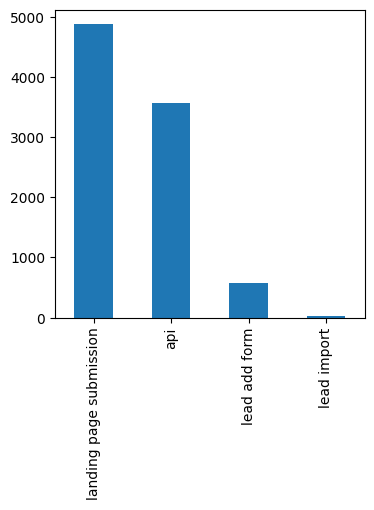

In [41]:
plt.figure(figsize = (4,4))
df['Lead Origin'].value_counts().plot.bar()
plt.show()

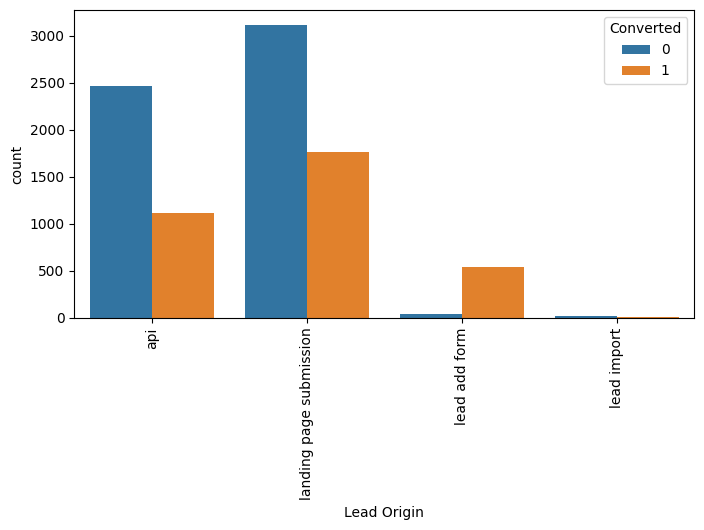

In [42]:
plt.figure(figsize=(8,4))
s1 = sns.countplot(data = df, x = 'Lead Origin', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insights:
# Majority of the Leads come from 'api' and 'landing page submission'
# Majority of the conversions also come from these two but the ratio is not very impressive
# A minority of the Lead come from 'lead add form' but the conversion rate is very impressive
# 'lead import' doesn't perform really well

# Conclusion:
# Try improving the conversion ratio in the 'api' and 'landing page submission' categories
# Take advantage of the leads coming from 'lead add form' and try to increase the numbers

Column: 'Lead Source'

In [44]:
df['Lead Source'].value_counts(normalize = True) * 100

google               31.661891
direct traffic       28.025127
olark chat           19.318933
organic search       12.717655
reference             4.882081
welingak website      1.421644
referral sites        1.377562
facebook              0.341635
bing                  0.066123
click2call            0.044082
social media          0.022041
live chat             0.022041
press_release         0.022041
pay per click ads     0.011020
blog                  0.011020
welearn               0.011020
welearnblog_home      0.011020
youtubechannel        0.011020
testone               0.011020
nc_edm                0.011020
Name: Lead Source, dtype: float64

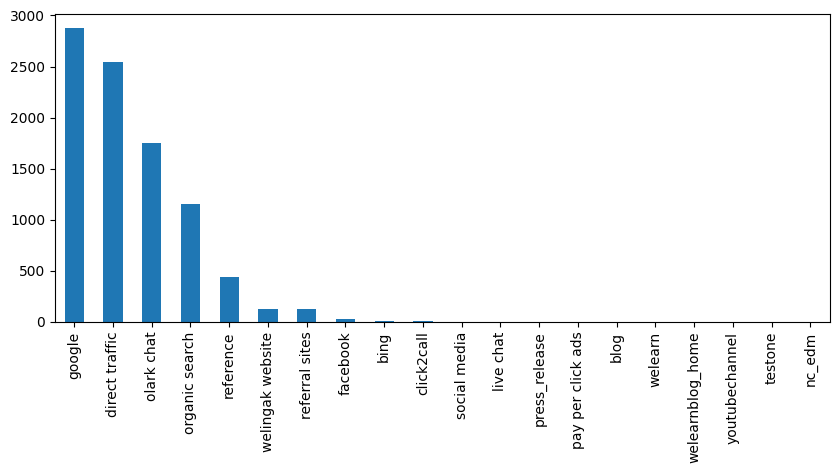

In [45]:
plt.figure(figsize = (10,4))
df['Lead Source'].value_counts().plot.bar()
plt.show()

# There are a lot of categories which have low numbers
# But they might have good conversion rates

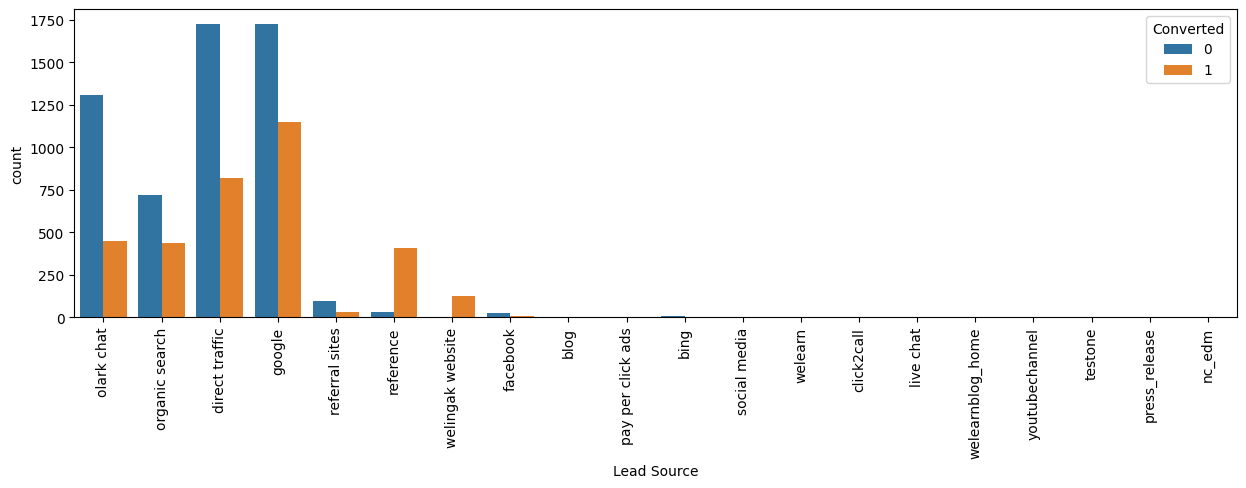

In [46]:
plt.figure(figsize=(15,4))
s1 = sns.countplot(data = df, x = 'Lead Source', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Majority of the leads come from 'olark chat', 'organic search', 'direct traffic', 'google'
# Majority of the converted leads also come from these categories due to their numbers but again, the conversion ratio is okayish
# 'referral sites' and 'facebook' perform really badly when it comes to converted leads
# On the other hand, 'reference' and 'welingak website' perform really good when it comes to conversion

# Conclusion:
# Try to improve the conversion rate if possible in the top four ('olark chat' etc) categories mentioned above
# Take advantage (i.e. get more number of leads) of the 'reference' and 'welingak website' categories, they perform remarkably well when it comes to conversion

Column: 'Do Not Email'

In [47]:
df['Do Not Email'].value_counts(normalize = True) * 100
# Over 90% of values are from one category
# This column does not have the necessary amount of variance to be conducive to our analysis and making predictions
# It would be wise to drop this column

no     92.109323
yes     7.890677
Name: Do Not Email, dtype: float64

In [48]:
df.drop('Do Not Email', axis = 1, inplace = True)

Column: 'Do Not Call'

In [49]:
df['Do Not Call'].value_counts(normalize = True) * 100
# Over 99% of values are from one category
# This column does not have the necessary amount of variance to be conducive to our analysis and making predictions
# It would be wise to drop this column

no     99.977959
yes     0.022041
Name: Do Not Call, dtype: float64

In [50]:
df.drop('Do Not Call', axis = 1, inplace = True)

Column: 'Converted'

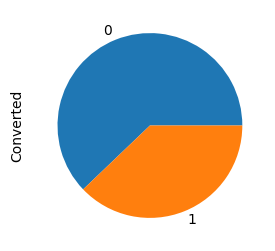

In [51]:
plt.figure(figsize = (3,3))
df.Converted.value_counts().plot.pie()
plt.show()
# This columns shows us the ratio of successfully converted leads vs unsuccessful ones
# Although it is not totally balanced, we can say that we have a pretty good number of data points from both categories

Column: 'TotalVisits'

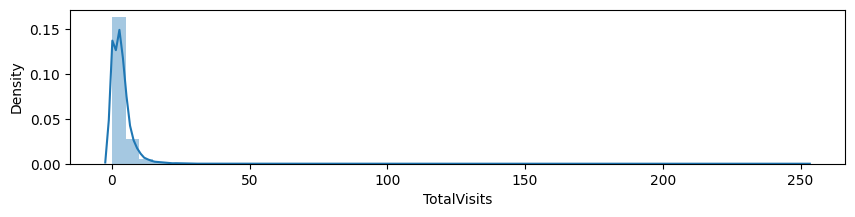

In [52]:
# TotalVisits 
plt.figure(figsize=(10, 2))
sns.distplot(df['TotalVisits'])
plt.show()
# Most of the values are in the range 0 to 20

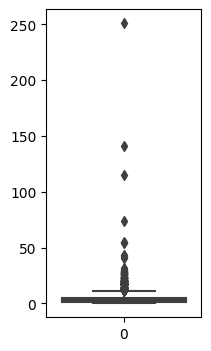

In [53]:
plt.figure(figsize = (2,4))
sns.boxplot(df['TotalVisits'])
plt.show()
# This column has a lot of outliers
# We need to remove them accordingly

In [54]:
df.TotalVisits.describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [55]:
print(df.TotalVisits.quantile(0.90))
print(df.TotalVisits.quantile(0.95))
print(df.TotalVisits.quantile(0.99))
# The maximum value is 251 while 99th percentile is 17
# Let's remove the outliers by taking the values until 99th percentile. It seems reasonable. 

7.0
10.0
17.0


In [56]:
df = df[df.TotalVisits <= df.TotalVisits.quantile(0.99)]

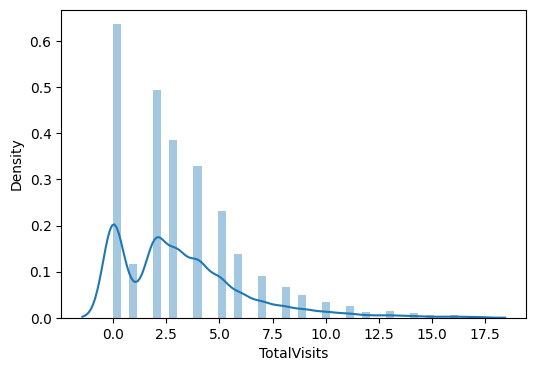

In [57]:
plt.figure(figsize=(6, 4))
sns.distplot(df['TotalVisits'])
plt.show()

In [58]:
# For not converted
df0 = df[df.Converted == 0]
# For converted
df1 = df[df.Converted == 1]

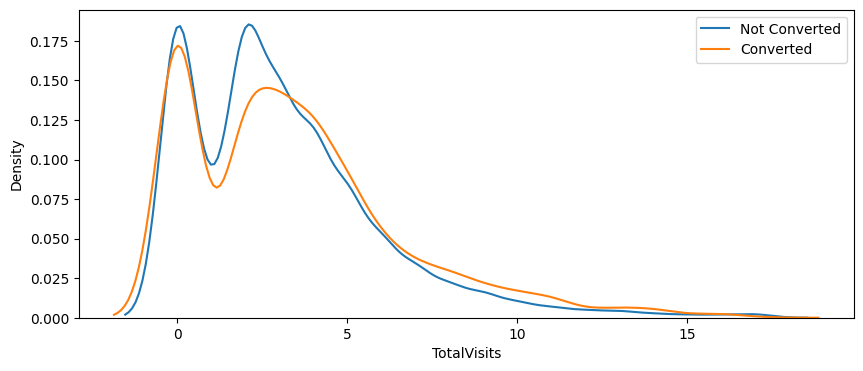

In [59]:
plt.figure(figsize=(10, 4))
sns.distplot(df0.TotalVisits,label='Not Converted',hist=False)
sns.distplot(df1.TotalVisits,label='Converted',hist=False)
plt.legend()
plt.show()

# We can definitely see a trend here
# Leads convert when TotalVisits are either low (around 0-3) and high (around 7-15)
# It basically says that there are two types of people who buy the product:
# One who visits the site a couple of times and others who visit a lot. In the middle, we have people where it TotalVisits doesn't affect the conversion rate.

Column: 'Total Time Spent on Website'

In [60]:
df['Total Time Spent on Website'].describe()

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
25%         9.000000
50%       245.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

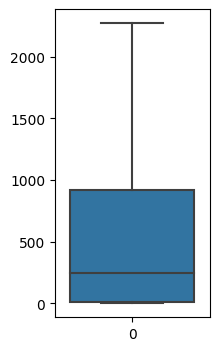

In [61]:
plt.figure(figsize = (2,4))
sns.boxplot(df['Total Time Spent on Website'])
plt.show()
# This column doesn't have an outlier problem

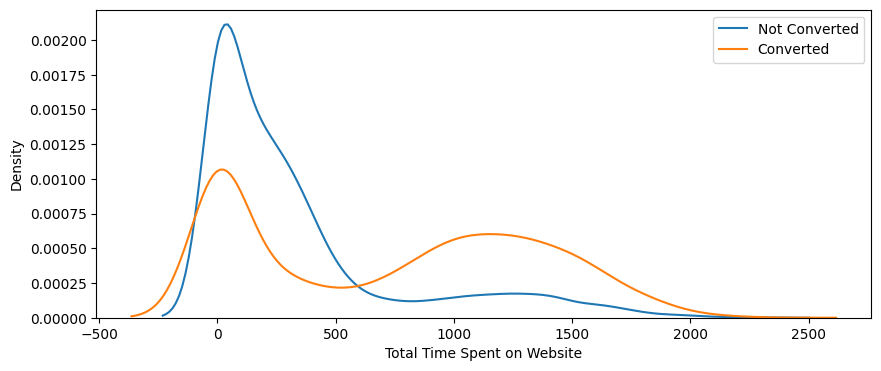

In [62]:
plt.figure(figsize=(10, 4))
sns.distplot(df0['Total Time Spent on Website'],label='Not Converted',hist=False)
sns.distplot(df1['Total Time Spent on Website'],label='Converted',hist=False)
plt.legend()
plt.show()

# There is a very clear trend here
# For values above 500 (approximately), we can see that leads do convert
# It makes sense since people who spent more time on the website were probably serious about the product

Column: 'Page Views Per Visit'

In [63]:
df['Page Views Per Visit'].describe()

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

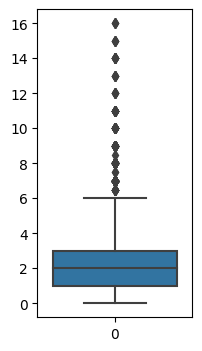

In [64]:
plt.figure(figsize = (2,4))
sns.boxplot(df['Page Views Per Visit'])
plt.show()
# This column has a couple of outliers

In [65]:
print(df['Page Views Per Visit'].quantile(0.75))
print(df['Page Views Per Visit'].quantile(0.80))
print(df['Page Views Per Visit'].quantile(0.90))
print(df['Page Views Per Visit'].quantile(0.95))
print(df['Page Views Per Visit'].quantile(0.99))

# The maximum value is 16 while the 99th percentile is 9
# 75th percentile is 3
# 80th percentile is 4
# 9 would be a reasonable value to use as a cutoff, we won't lose 99% of the values.

3.0
4.0
5.0
6.0
9.0


In [66]:
df = df[df['Page Views Per Visit'] <= 9]

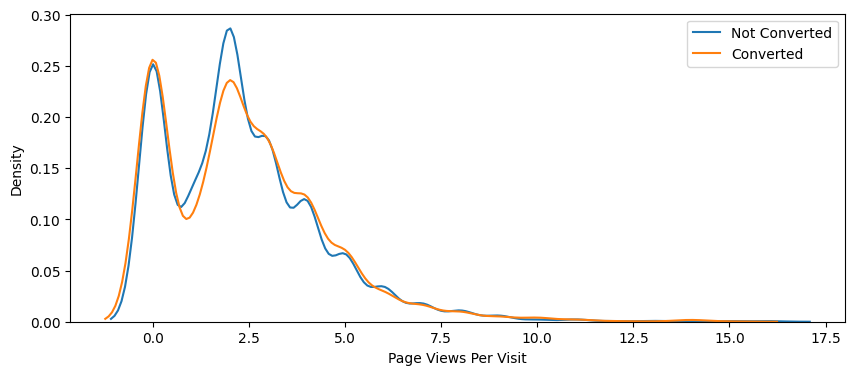

In [67]:
plt.figure(figsize=(10, 4))
sns.distplot(df0['Page Views Per Visit'],label='Not Converted',hist=False)
sns.distplot(df1['Page Views Per Visit'],label='Converted',hist=False)
plt.legend()
plt.show()

# There's a lot of overlapping here
# We can see that below 2.5, the 'not converted' are slightly more
# While above 2.5 till 5, the 'converted' is slighlty higher

Column: 'Last Activity'

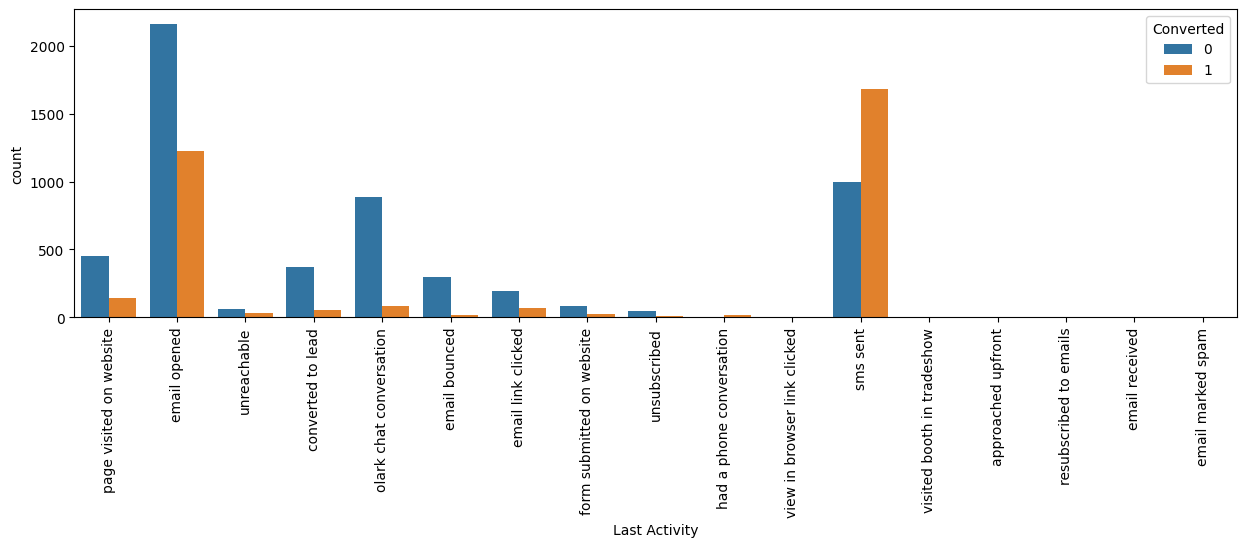

In [68]:
plt.figure(figsize=(15,4))
s1 = sns.countplot(data = df, x = 'Last Activity', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insight:
# 'email opened' and 'sms sent' have majority of the leads but contrasting conversion rates.
# 'email opened' has a negative conversion rate i.e. less leads converted
# 'sms sent' has a positive conversion rate i.e. more leads converted
# Categories like 'unreachable', 'converted to lead', ..., 'unsubscribed' have low number of leads and a negative conversion rate
# While the other categories don't even have that many leads 

# Conclusion:
# Take advantage of 'sms sent' category, it will increase the number of converted leads
# Do something about the 'email opened' category, a lot of leads come from here but don't get converted


Column: 'Specialization'

In [69]:
df['Specialization'].value_counts(normalize = True) * 100

unstated                             36.553115
finance management                   10.555805
human resource management             9.177499
marketing management                  9.121470
operations management                 5.535634
business administration               4.370238
it projects management                4.034065
supply chain management               3.787539
banking, investment and insurance     3.641865
media and advertising                 2.207530
travel and tourism                    2.117884
international business                1.916181
healthcare management                 1.680861
e-commerce                            1.199014
hospitality management                1.199014
retail management                     1.064545
rural and agribusiness                0.784402
e-business                            0.627521
services excellence                   0.425818
Name: Specialization, dtype: float64

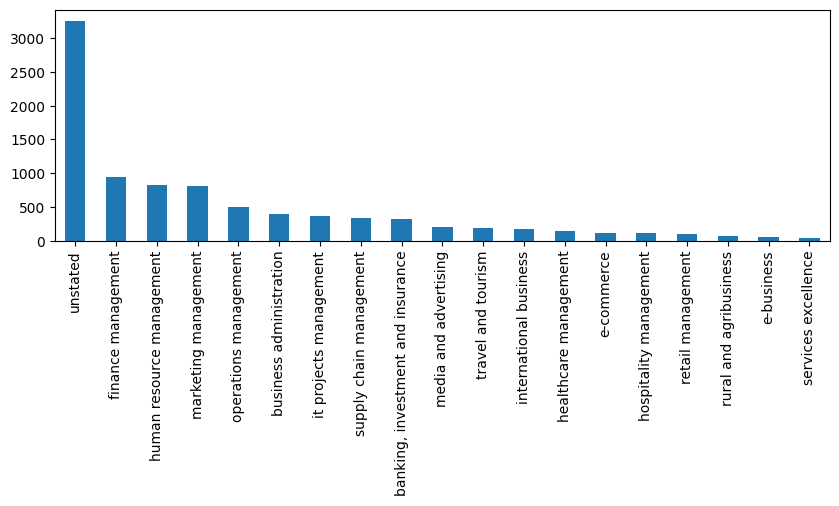

In [70]:
plt.figure(figsize = (10,3))
df['Specialization'].value_counts().plot.bar()
plt.show()

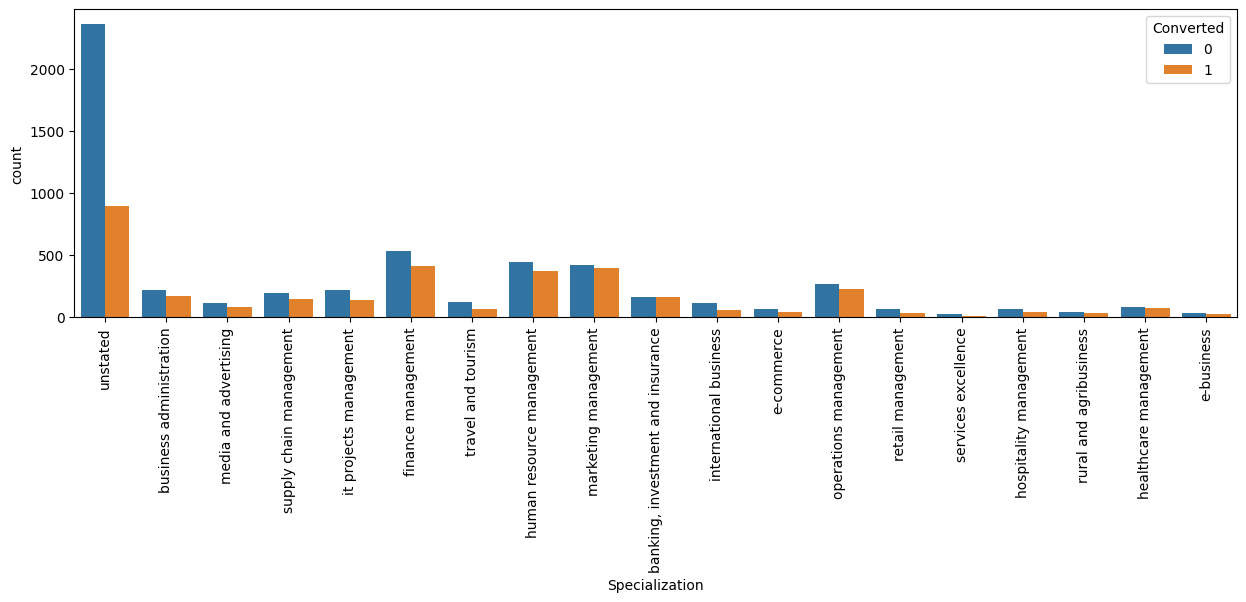

In [71]:
plt.figure(figsize=(15,4))
s1 = sns.countplot(data = df, x = 'Specialization', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insight:
# 36% of the values are in 'unstated' category. We can see that there is bad conversion ratio there
# We can see in almost none of the categories, the conversion ratio is positive
# We can however see that in other categories, the conversion ratio is atleast better than 'unstated'

# Conclusion:
# When the student fills anything but 'unstated' i.e. they know what they are doing. It shows that the lead has better chances of being converted.
# Choosing a specialization shows preparation and seriousness on the part of the student
# So in the case of any specialization but 'unstated', the conversion ratio would be better than the 'unstated' category

Column: 'What is your current occupation'

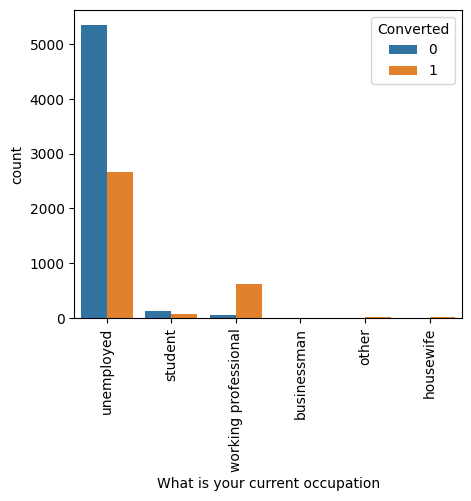

In [72]:
plt.figure(figsize=(5,4))
s1 = sns.countplot(data = df, x = 'What is your current occupation', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insight:
# A sharp trend can be seen
# 'unemployed' gets the most number of leads but the conversion ratio is bad
# 'working professional' gets less number of lead but the conversion ratio is pretty good

# Conclusion:
# Try to convert more leads in the 'unemployed' category
# Take advantage of the 'working professional' category, the conversion ratio is remarkable

Columns: 
- 'Search'
- 'Magazine'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations'
- 'Receive More Updates About Our Courses'
- 'Update me on Supply Chain Content'
- 'Get updates on DM Content'
- 'I agree to pay the amount through cheque'

In [73]:
print('------------------------------------------')
print(df['Search'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Magazine'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Newspaper Article'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['X Education Forums'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Newspaper'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Digital Advertisement'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Through Recommendations'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Receive More Updates About Our Courses'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Update me on Supply Chain Content'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Get updates on DM Content'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['I agree to pay the amount through cheque'].value_counts(normalize = True) * 100)
print('------------------------------------------')

# An overwhelming amount of values belong to one category in these columns
# Therefore, these columns don't have the necessary amount of variance to be conducive to our analysis and making predictions
# It would be wise to drop these columns

------------------------------------------
no     99.854325
yes     0.145675
Name: Search, dtype: float64
------------------------------------------
no    100.0
Name: Magazine, dtype: float64
------------------------------------------
no     99.988794
yes     0.011206
Name: Newspaper Article, dtype: float64
------------------------------------------
no    100.0
Name: X Education Forums, dtype: float64
------------------------------------------
no     99.988794
yes     0.011206
Name: Newspaper, dtype: float64
------------------------------------------
no     99.966383
yes     0.033617
Name: Digital Advertisement, dtype: float64
------------------------------------------
no     99.932766
yes     0.067234
Name: Through Recommendations, dtype: float64
------------------------------------------
no    100.0
Name: Receive More Updates About Our Courses, dtype: float64
------------------------------------------
no    100.0
Name: Update me on Supply Chain Content, dtype: float64
---------------

In [74]:
useless_columns = [
    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
    'Get updates on DM Content', 'I agree to pay the amount through cheque'
]

df.drop(useless_columns, axis = 1, inplace = True)

Column: 'A free copy of Mastering The Interview'

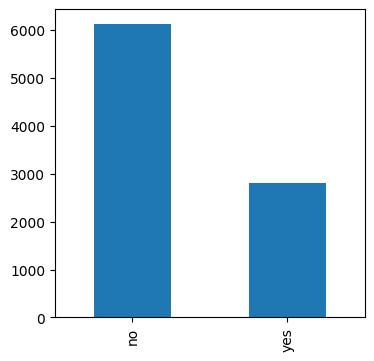

In [75]:
plt.figure(figsize = (4,4))
df['A free copy of Mastering The Interview'].value_counts().plot.bar()
plt.show()
# The two categories in this column don't have a huge imbalance.

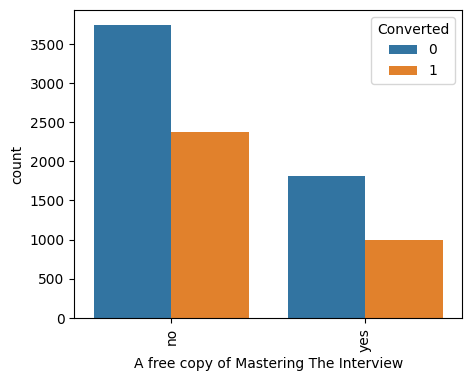

In [76]:
plt.figure(figsize=(5,4))
s1 = sns.countplot(data = df, x = 'A free copy of Mastering The Interview', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [77]:
# Conversion not successful
df0['A free copy of Mastering The Interview'].value_counts(normalize = True) * 100

no     67.310443
yes    32.689557
Name: A free copy of Mastering The Interview, dtype: float64

In [78]:
# Conversion successful
df1['A free copy of Mastering The Interview'].value_counts(normalize = True) * 100
# By looking at the plot and the value counts, it seems that this column doesn't really make a difference when it comes to predictions
# When we will build our model, this feature should definitely appear less significant and would be removed.

no     70.314798
yes    29.685202
Name: A free copy of Mastering The Interview, dtype: float64

Column: 'Last Notable Activity'

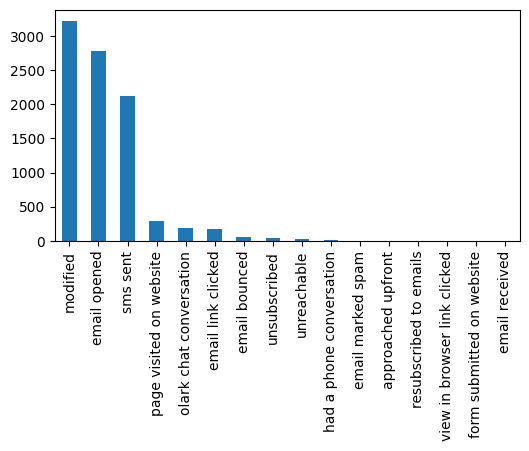

In [79]:
plt.figure(figsize=(6,3))
df['Last Notable Activity'].value_counts().plot.bar()
plt.show()

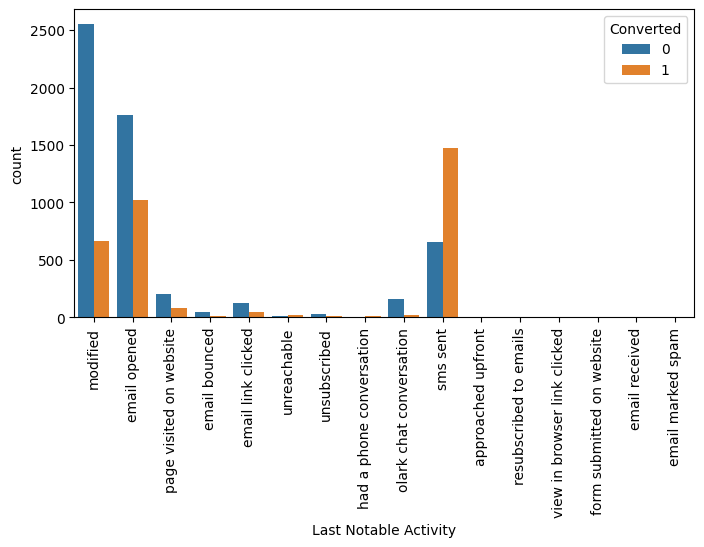

In [80]:
plt.figure(figsize=(8,4))
s1 = sns.countplot(data = df, x = 'Last Notable Activity', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insight:
# 'modified' and 'email opened' receive the most amount of leads while the conversion ration is bad
# 'sms sent' also receives a lot of leads but with a pretty remarkable conversion ratio
# Although 'unreachable' receives low number of leads, its conversion ratio seems pretty good too
# All the other categories don't amount to much since the number of leads received are pretty low

# Conclusion:
# Do something about the 'modified' and 'email opened' categories, they receive a lot of leads but they don't get converted as much
# Take advantage of the 'sms sent' category, it has a pretty good conversion ratio

In [81]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0.0,0,0.0,page visited on website,unstated,unemployed,no,modified
1,api,organic search,0,5.0,674,2.5,email opened,unstated,unemployed,no,email opened
2,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,business administration,student,yes,email opened
3,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,media and advertising,unemployed,no,modified
4,landing page submission,google,1,2.0,1428,1.0,converted to lead,unstated,unemployed,no,modified


In [82]:
list(df.columns)

['Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [83]:
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', ]
categorical_columns = [el for el in list(df.columns) if el not in numerical_columns]
print(numerical_columns)
print(categorical_columns)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
['Lead Origin', 'Lead Source', 'Converted', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


### Bivariate Analysis

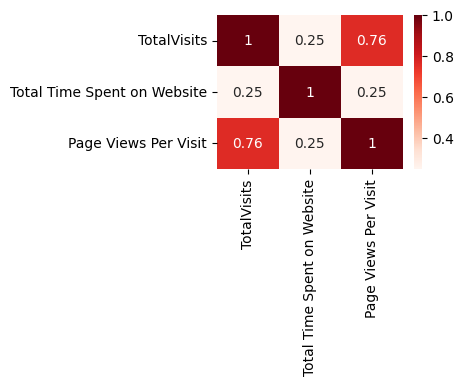

In [84]:
plt.figure(figsize = (3,2))
sns.heatmap(df0.loc[:,numerical_columns].corr(), annot = True, cmap = 'Reds')
plt.show()

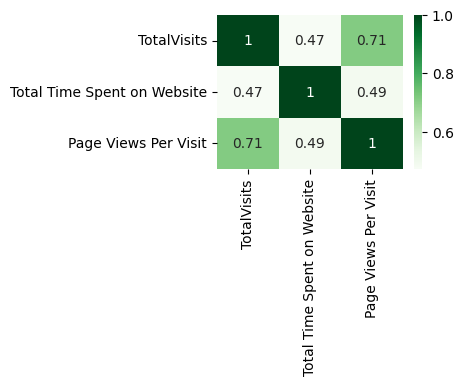

In [85]:
plt.figure(figsize = (3,2))
sns.heatmap(df1.loc[:,numerical_columns].corr(), annot = True, cmap = 'Greens')
plt.show()

# After looking at this and the heatmap above
# It can be concluded that the leads do get converted when the correlation between
# 'Total Time Spent of Website' with 'TotalVists' and 'Page Views Per Visit' is higher
# There is always high correlation between 'TotalVisits' and 'Page View Per Visit', no matter the lead gets converted or not.

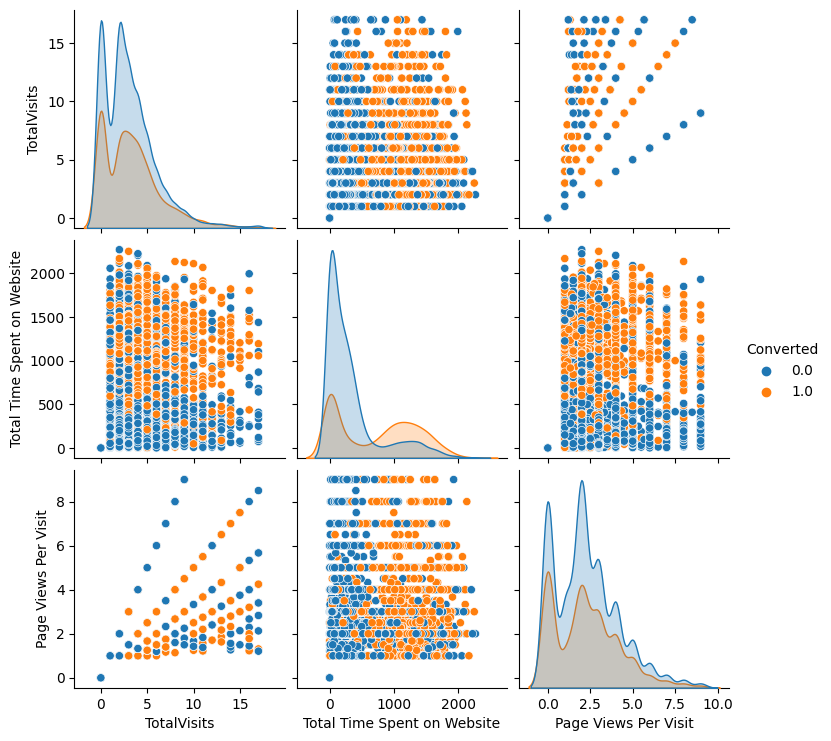

In [86]:
df['Converted'] = df['Converted'].astype(float)
sns.pairplot(df, hue='Converted', vars = numerical_columns)
plt.show()

In [87]:
categorical_columns

['Lead Origin',
 'Lead Source',
 'Converted',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

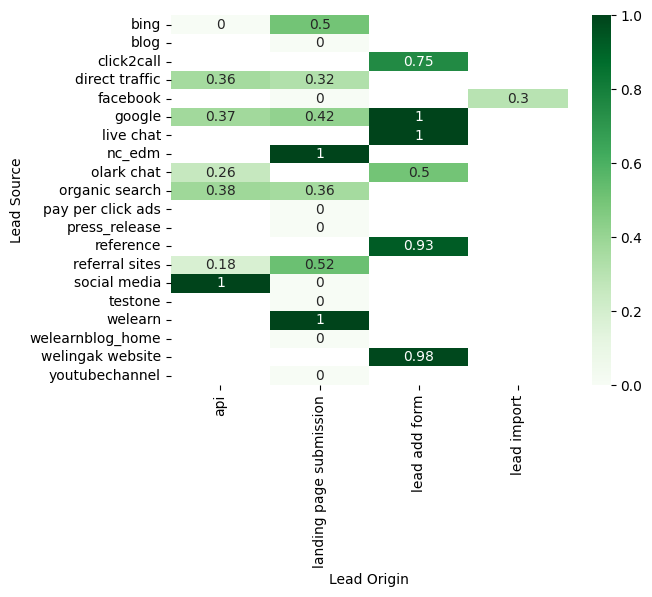

In [88]:
p = pd.pivot_table(data = df, values = 'Converted', columns = 'Lead Origin', index = 'Lead Source', aggfunc = 'mean')
sns.heatmap(p, annot = True, cmap = 'Greens')
plt.show()

# We can see some good combinations here like:
# 'api' + 'social media', 'landing page submission' + 'nc_edm'/'welearn' etc
# Although we do see some bad combination but they might be there since there is less data from those categories

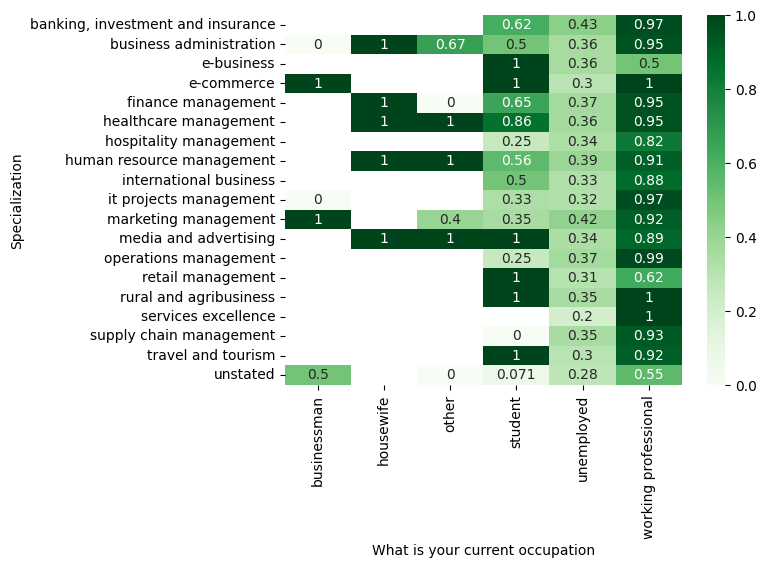

In [89]:
p = pd.pivot_table(data = df, values = 'Converted', index = 'Specialization', columns = 'What is your current occupation', aggfunc = 'mean')
sns.heatmap(p, annot = True, cmap = 'Greens')
plt.show()

Let's have a look at our dataset

Let's see how we can make it better

In [90]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('---------------------------------------------')

# For every categorical column containing more than one category, we will need to assign dummy variables 
# For n categories, n-1 dummy variables are needed
# For columns like Lead Source, Last Activity, Specialization and Last Notable Activity, we have a lot of categories
# This would mean a lot of columns in our dataset
# Let's see if we can collate these different categories together based on the conversion count 
# Because if a number of categories have very less conversion count, we might just count them together since they have low impact of conversion

Lead Origin
['api' 'landing page submission' 'lead add form' 'lead import']
---------------------------------------------
Lead Source
['olark chat' 'organic search' 'direct traffic' 'google' 'referral sites'
 'reference' 'welingak website' 'facebook' 'blog' 'pay per click ads'
 'bing' 'social media' 'welearn' 'click2call' 'live chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']
---------------------------------------------
Converted
[0. 1.]
---------------------------------------------
TotalVisits
[ 0.  5.  2.  1.  4.  8.  6.  3.  7. 17. 11.  9. 12. 10. 13. 14. 16. 15.]
---------------------------------------------
Total Time Spent on Website
[   0  674 1532 ...  483  927 1845]
---------------------------------------------
Page Views Per Visit
[0.   2.5  2.   1.   4.   8.   2.67 5.   6.   3.   1.33 1.5  3.5  7.
 2.33 8.5  5.5  1.67 4.5  3.33 1.71 1.8  6.5  4.33 3.4  1.25 1.75 2.25
 3.67 1.43 9.   2.6  1.27 3.25 5.33 2.17 2.75 2.8  2.2  1.4  5.67 3.2
 2.4  1.

Column: 'Lead Source'

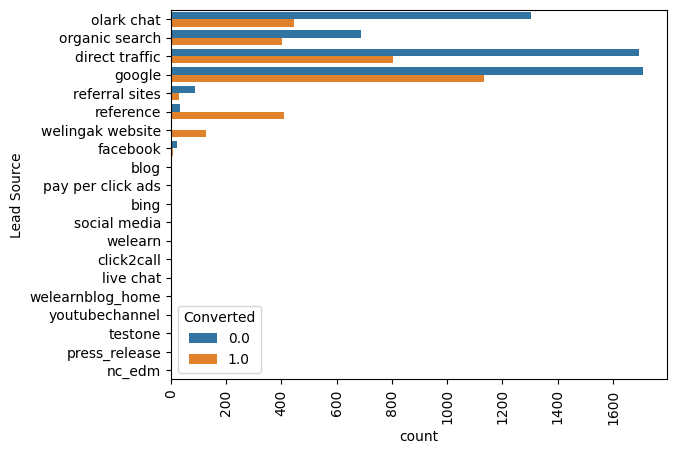

In [92]:
s1 = sns.countplot(data = df, y = 'Lead Source', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Clearly there are some categories that would be better off together

In [93]:
others = [el for el in df['Lead Source'].unique() if el not in ['olark chat', 'organic search', 'direct traffic', 'google', 'referral sites', 'reference', 'welingak website']]

In [94]:
df['Lead Source'] = df['Lead Source'].replace(others, 'others')

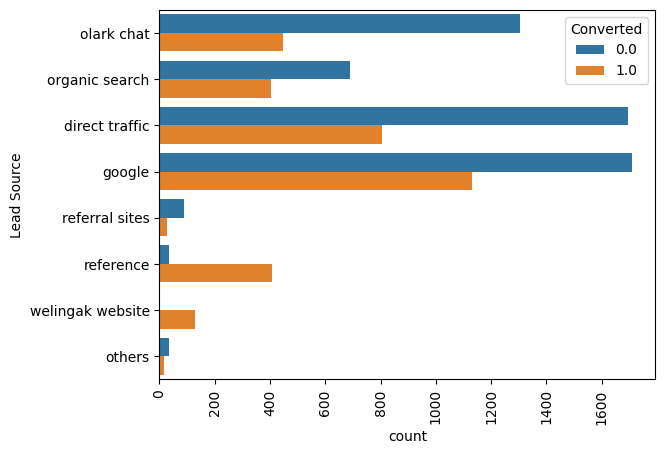

In [95]:
s1 = sns.countplot(data = df, y = 'Lead Source', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()
# This is better
# Now we now won't have the problem to too many dummy variables
# Let's do this for other columns as well

Column: 'Last Activity'

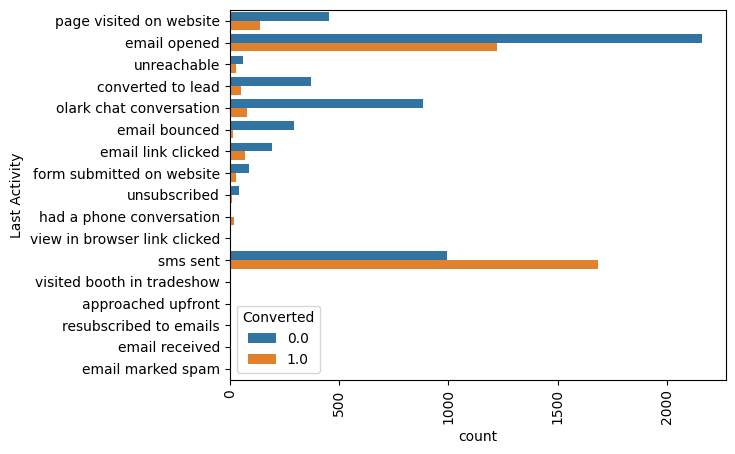

In [96]:
s1 = sns.countplot(data = df, y = 'Last Activity', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [97]:
others = [el for el in df['Last Activity'].unique() if el not in ['page visited on website', 'email opened', 'converted to lead', 'olark chat conversation', 'email bounced', 'email link clicked', 'form submitted on website', 'sms sent']]

In [98]:
df['Last Activity'] = df['Last Activity'].replace(others, 'others')

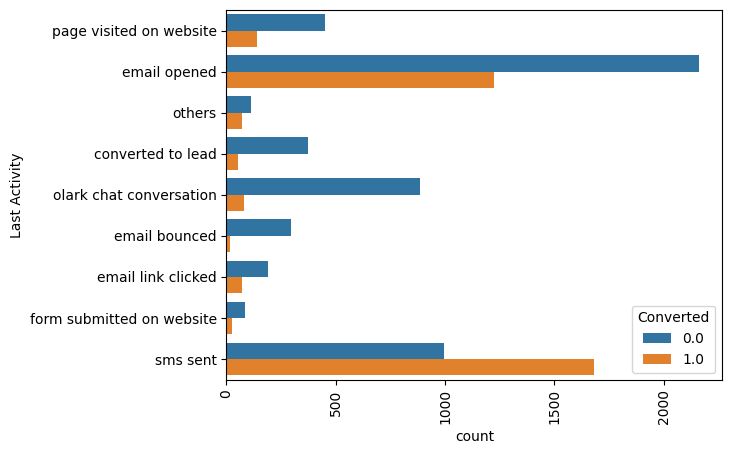

In [99]:
s1 = sns.countplot(data = df, y = 'Last Activity', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Column: 'Specialization'

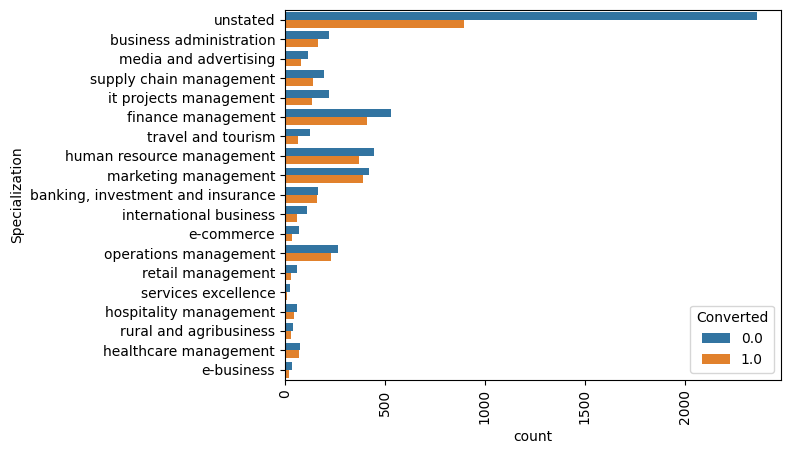

In [100]:
s1 = sns.countplot(data = df, y = 'Specialization', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# A lot of categories belonging to management class, lets put them together into 'management'
# And put the rest into 'business'

In [101]:
management = ['supply chain management', 'it projects management', 'finance management', 'human resource management', 'marketing management', 'operations management', 'retail management', 'hospitality management', 'healthcare management']

In [102]:
business = [el for el in df['Specialization'].unique() if el not in management]
business.remove('unstated')

In [103]:
df['Specialization'] = df['Specialization'].replace(management, 'management')
df['Specialization'] = df['Specialization'].replace(business, 'business')

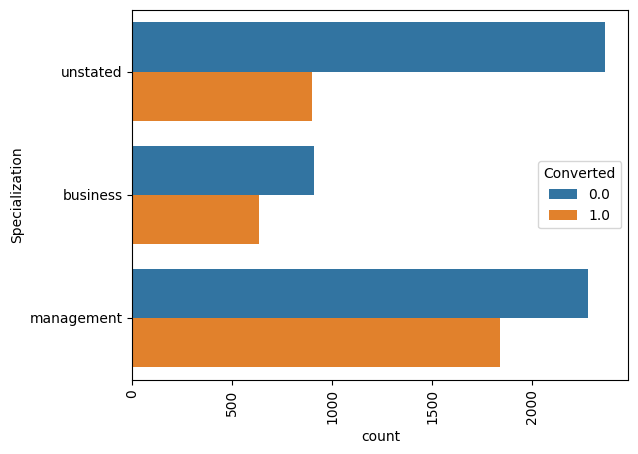

In [104]:
s1 = sns.countplot(data = df, y = 'Specialization', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# This is better

Column: 'Last Notable Activity'

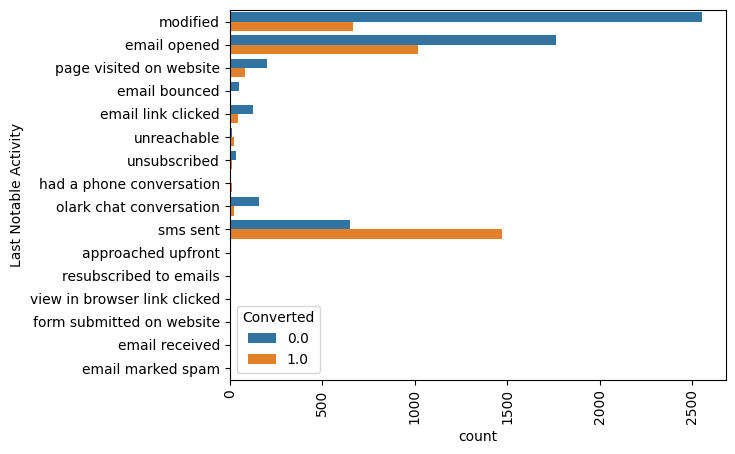

In [105]:
s1 = sns.countplot(data = df, y = 'Last Notable Activity', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Clearly, the categories with no presence should be put together
# It would be a beneficial representation when we create dummy variables

In [106]:
others = [el for el in df['Last Notable Activity'].unique() if el not in ['modified', 'email opened', 'sms sent', 'page visited on website', 'olark chat conversation', 'email link clicked']]

In [107]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(others, 'others')

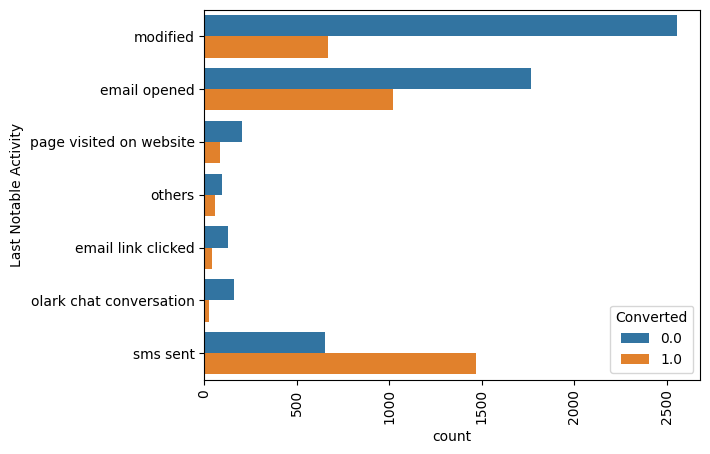

In [108]:
s1 = sns.countplot(data = df, y = 'Last Notable Activity', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Let's look at our dataset again

In [109]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('---------------------------------------------')

Lead Origin
['api' 'landing page submission' 'lead add form' 'lead import']
---------------------------------------------
Lead Source
['olark chat' 'organic search' 'direct traffic' 'google' 'referral sites'
 'reference' 'welingak website' 'others']
---------------------------------------------
Converted
[0. 1.]
---------------------------------------------
TotalVisits
[ 0.  5.  2.  1.  4.  8.  6.  3.  7. 17. 11.  9. 12. 10. 13. 14. 16. 15.]
---------------------------------------------
Total Time Spent on Website
[   0  674 1532 ...  483  927 1845]
---------------------------------------------
Page Views Per Visit
[0.   2.5  2.   1.   4.   8.   2.67 5.   6.   3.   1.33 1.5  3.5  7.
 2.33 8.5  5.5  1.67 4.5  3.33 1.71 1.8  6.5  4.33 3.4  1.25 1.75 2.25
 3.67 1.43 9.   2.6  1.27 3.25 5.33 2.17 2.75 2.8  2.2  1.4  5.67 3.2
 2.4  1.83 1.2  1.57 1.56 4.25 1.31 1.6  1.23 1.78 7.5  1.14 1.45 1.86
 2.29 1.21 1.22 1.38 3.75 2.13 2.14 1.63 1.17 2.83]
--------------------------------------------

### Creating Dummy Variables

In [110]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0.0,0.0,0,0.0,page visited on website,unstated,unemployed,no,modified
1,api,organic search,0.0,5.0,674,2.5,email opened,unstated,unemployed,no,email opened
2,landing page submission,direct traffic,1.0,2.0,1532,2.0,email opened,business,student,yes,email opened
3,landing page submission,direct traffic,0.0,1.0,305,1.0,others,business,unemployed,no,modified
4,landing page submission,google,1.0,2.0,1428,1.0,converted to lead,unstated,unemployed,no,modified


Column: 'A free copy of Mastering The Interview'

In [111]:
# This column has just 2 categories. We can just replace them 0 and 1. We don't need dummy variables in this case
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x == 'yes' else 0)

Column: 'Lead Origin'

In [112]:
dummies = pd.get_dummies(df['Lead Origin'], prefix = 'Lead_Origin_', drop_first = True)
df.drop('Lead Origin', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

Column: 'Lead Source'

In [113]:
dummies = pd.get_dummies(df['Lead Source'], prefix = 'Lead_Source_', drop_first = True)
df.drop('Lead Source', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

Column: 'Last Activity'

In [114]:
dummies = pd.get_dummies(df['Last Activity'], prefix = 'Last_Activity_', drop_first = True)
df.drop('Last Activity', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

Column: 'Specialization'

In [115]:
dummies = pd.get_dummies(df['Specialization'], prefix = 'Specialization_', drop_first = True)
df.drop('Specialization', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

Column: 'What is your current occupation'

In [116]:
dummies = pd.get_dummies(df['What is your current occupation'], prefix = 'What_occupation_', drop_first = True)
df.drop('What is your current occupation', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

Column: 'Last Notable Activity'

In [117]:
dummies = pd.get_dummies(df['Last Notable Activity'], prefix = 'Last_Notable_Activity_', drop_first = True)
df.drop('Last Notable Activity', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

In [118]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin__landing page submission,Lead_Origin__lead add form,Lead_Origin__lead import,Lead_Source__google,Lead_Source__olark chat,...,What_occupation__other,What_occupation__student,What_occupation__unemployed,What_occupation__working professional,Last_Notable_Activity__email opened,Last_Notable_Activity__modified,Last_Notable_Activity__olark chat conversation,Last_Notable_Activity__others,Last_Notable_Activity__page visited on website,Last_Notable_Activity__sms sent
0,0.0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0.0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1.0,2.0,1532,2.0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0.0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1.0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [119]:
print(len(df.columns))
list(df.columns)

36


['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'Lead_Origin__landing page submission',
 'Lead_Origin__lead add form',
 'Lead_Origin__lead import',
 'Lead_Source__google',
 'Lead_Source__olark chat',
 'Lead_Source__organic search',
 'Lead_Source__others',
 'Lead_Source__reference',
 'Lead_Source__referral sites',
 'Lead_Source__welingak website',
 'Last_Activity__email bounced',
 'Last_Activity__email link clicked',
 'Last_Activity__email opened',
 'Last_Activity__form submitted on website',
 'Last_Activity__olark chat conversation',
 'Last_Activity__others',
 'Last_Activity__page visited on website',
 'Last_Activity__sms sent',
 'Specialization__management',
 'Specialization__unstated',
 'What_occupation__housewife',
 'What_occupation__other',
 'What_occupation__student',
 'What_occupation__unemployed',
 'What_occupation__working professional',
 'Last_Notable_Activity__email opened',
 'Last_Notable_Acti

#### Splitting the dataset into train and test sets

Importing necessary libraries

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30)

In [122]:
df_train.shape

(6246, 36)

In [123]:
df_test.shape

(2678, 36)

#### Feature Scaling

In [124]:
numerical_columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [125]:
# Applying Feature Scaling to numerical variables
scaler = StandardScaler()

df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

In [126]:
df_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin__landing page submission,Lead_Origin__lead add form,Lead_Origin__lead import,Lead_Source__google,Lead_Source__olark chat,...,What_occupation__other,What_occupation__student,What_occupation__unemployed,What_occupation__working professional,Last_Notable_Activity__email opened,Last_Notable_Activity__modified,Last_Notable_Activity__olark chat conversation,Last_Notable_Activity__others,Last_Notable_Activity__page visited on website,Last_Notable_Activity__sms sent
count,6246.000000,6.246000e+03,6.246000e+03,6.246000e+03,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,...,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000
mean,0.384566,-1.820154e-17,-3.697188e-17,-2.752983e-16,0.314121,0.539065,0.065322,0.003682,0.319565,0.190842,...,0.001121,0.023375,0.900416,0.073487,0.310118,0.362472,0.019693,0.018092,0.032020,0.239994
std,0.486532,1.000080e+00,1.000080e+00,1.000080e+00,0.464202,0.498511,0.247113,0.060575,0.466345,0.392996,...,0.033461,0.151103,0.299468,0.260955,0.462579,0.480753,0.138953,0.133293,0.176069,0.427113
min,0.000000,-1.094234e+00,-8.862732e-01,-1.215792e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.484418e-01,-8.679813e-01,-6.875032e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-5.685700e-02,-4.344629e-01,-1.592141e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.347278e-01,8.167042e-01,3.690750e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.784237e+00,3.269650e+00,3.538809e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
y_train = df_train.pop('Converted')
X_train = df_train

In [128]:
print(y_train.shape)
print(df_train.shape)

(6246,)
(6246, 35)


In [129]:
lm = LogisticRegression()

#### Using Recursive Feature Elimination for Feature Selection

In [130]:
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
g = pd.DataFrame(rfe_list)
g

,0,1,2
0,TotalVisits,False,11
1,Total Time Spent on Website,True,1
2,Page Views Per Visit,False,10
3,A free copy of Mastering The Interview,False,8
4,Lead_Origin__landing page submission,True,1
5,Lead_Origin__lead add form,True,1
6,Lead_Origin__lead import,True,1
7,Lead_Source__google,False,15
8,Lead_Source__olark chat,True,1
9,Lead_Source__organic search,False,16


In [132]:
g[(g[1] == True)]
# We will select these features for further model building

,0,1,2
1,Total Time Spent on Website,True,1
4,Lead_Origin__landing page submission,True,1
5,Lead_Origin__lead add form,True,1
6,Lead_Origin__lead import,True,1
8,Lead_Source__olark chat,True,1
11,Lead_Source__reference,True,1
13,Lead_Source__welingak website,True,1
14,Last_Activity__email bounced,True,1
18,Last_Activity__olark chat conversation,True,1
21,Last_Activity__sms sent,True,1


In [133]:
g[(g[1] == False)]
# These features will be discarded

,0,1,2
0,TotalVisits,False,11
2,Page Views Per Visit,False,10
3,A free copy of Mastering The Interview,False,8
7,Lead_Source__google,False,15
9,Lead_Source__organic search,False,16
10,Lead_Source__others,False,12
12,Lead_Source__referral sites,False,14
15,Last_Activity__email link clicked,False,9
16,Last_Activity__email opened,False,2
17,Last_Activity__form submitted on website,False,19


In [134]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead_Origin__landing page submission',
       'Lead_Origin__lead add form', 'Lead_Origin__lead import',
       'Lead_Source__olark chat', 'Lead_Source__reference',
       'Lead_Source__welingak website', 'Last_Activity__email bounced',
       'Last_Activity__olark chat conversation', 'Last_Activity__sms sent',
       'Specialization__unstated', 'What_occupation__housewife',
       'What_occupation__working professional',
       'Last_Notable_Activity__others', 'Last_Notable_Activity__sms sent'],
      dtype='object')

In [135]:
X_train_rfe = X_train[cols]
X_train_rfe.head()

,Total Time Spent on Website,Lead_Origin__landing page submission,Lead_Origin__lead add form,Lead_Origin__lead import,Lead_Source__olark chat,Lead_Source__reference,Lead_Source__welingak website,Last_Activity__email bounced,Last_Activity__olark chat conversation,Last_Activity__sms sent,Specialization__unstated,What_occupation__housewife,What_occupation__working professional,Last_Notable_Activity__others,Last_Notable_Activity__sms sent
6384,-0.886273,0,0,0,1,0,0,0,0,1,0,0,1,0,1
3224,-0.372270,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2284,0.222217,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5132,-0.560677,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2081,-0.886273,0,0,0,1,0,0,0,0,1,1,0,0,0,1


In [136]:
list(cols)

['Total Time Spent on Website',
 'Lead_Origin__landing page submission',
 'Lead_Origin__lead add form',
 'Lead_Origin__lead import',
 'Lead_Source__olark chat',
 'Lead_Source__reference',
 'Lead_Source__welingak website',
 'Last_Activity__email bounced',
 'Last_Activity__olark chat conversation',
 'Last_Activity__sms sent',
 'Specialization__unstated',
 'What_occupation__housewife',
 'What_occupation__working professional',
 'Last_Notable_Activity__others',
 'Last_Notable_Activity__sms sent']

#### Using statsmodels to build the model

In [137]:
# Writing functions for the code that will used repeatedly later

# Given a set of features (X_train_rfe) and answers (y_train), train a Logistic Regression Model
def build(X_train_rfe, y_train):
    X_train_lm1 = sm.add_constant(X_train_rfe)
    lr = sm.GLM(y_train, X_train_lm1, family = sm.families.Binomial()).fit()
    print(lr.summary())
    return lr
    
# Given a set of features (X_train_rfe), print the Variance Inflation Factor of all of them.
def vif_check(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    

Checking VIF

In [139]:
vif_check(X_train_rfe)

,Features,VIF
2,Lead_Origin__lead add form,68.08
5,Lead_Source__reference,53.54
6,Lead_Source__welingak website,15.97
9,Last_Activity__sms sent,5.27
14,Last_Notable_Activity__sms sent,4.75
4,Lead_Source__olark chat,2.06
10,Specialization__unstated,2.01
8,Last_Activity__olark chat conversation,1.46
1,Lead_Origin__landing page submission,1.41
0,Total Time Spent on Website,1.30


In [140]:
lr1 = build(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.8
Date:                Mon, 22 May 2023   Deviance:                       5245.5
Time:                        16:41:07   Pearson chi2:                 6.30e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3890
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [141]:
# Dropping the column 'What_occupation__housewife' because of high p-value
X_train_rfe.drop('What_occupation__housewife', axis = 1, inplace = True)

------------------------------------------------------------------------------------------------------------

In [142]:
vif_check(X_train_rfe)

,Features,VIF
2,Lead_Origin__lead add form,68.08
5,Lead_Source__reference,53.53
6,Lead_Source__welingak website,15.97
9,Last_Activity__sms sent,5.27
13,Last_Notable_Activity__sms sent,4.75
4,Lead_Source__olark chat,2.06
10,Specialization__unstated,2.01
8,Last_Activity__olark chat conversation,1.46
1,Lead_Origin__landing page submission,1.41
0,Total Time Spent on Website,1.30


In [143]:
lr2 = build(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.7
Date:                Mon, 22 May 2023   Deviance:                       5251.5
Time:                        16:42:07   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [144]:
# Dropping 'Lead_Origin__lead add form' because of high p-value
X_train_rfe.drop('Lead_Origin__lead add form', axis = 1, inplace = True)

------------------------------------------------------------------------------------------------------------

In [145]:
vif_check(X_train_rfe)

,Features,VIF
8,Last_Activity__sms sent,5.27
12,Last_Notable_Activity__sms sent,4.75
3,Lead_Source__olark chat,2.06
9,Specialization__unstated,2.01
7,Last_Activity__olark chat conversation,1.46
1,Lead_Origin__landing page submission,1.41
0,Total Time Spent on Website,1.29
4,Lead_Source__reference,1.21
10,What_occupation__working professional,1.18
6,Last_Activity__email bounced,1.15


In [146]:
lr3 = build(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.2
Date:                Mon, 22 May 2023   Deviance:                       5252.4
Time:                        16:43:03   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [147]:
# Dropping the 'Last_Activity__sms sent' because of high p-value
X_train_rfe.drop('Last_Activity__sms sent', axis = 1, inplace = True)

------------------------------------------------------------------------------------------------------------

In [148]:
vif_check(X_train_rfe)

,Features,VIF
3,Lead_Source__olark chat,2.06
8,Specialization__unstated,1.97
7,Last_Activity__olark chat conversation,1.44
11,Last_Notable_Activity__sms sent,1.42
1,Lead_Origin__landing page submission,1.32
0,Total Time Spent on Website,1.29
4,Lead_Source__reference,1.20
9,What_occupation__working professional,1.18
6,Last_Activity__email bounced,1.14
10,Last_Notable_Activity__others,1.10


In [149]:
lr4 = build(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.9
Date:                Mon, 22 May 2023   Deviance:                       5253.8
Time:                        16:43:53   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------

In [208]:
vif_check(X_train_rfe)
# All the vifs are pretty low now
# We can move forward with the final lr4 model

,Features,VIF
3,Lead_Source__olark chat,2.06
8,Specialization__unstated,1.97
7,Last_Activity__olark chat conversation,1.44
11,Last_Notable_Activity__sms sent,1.42
1,Lead_Origin__landing page submission,1.32
0,Total Time Spent on Website,1.29
4,Lead_Source__reference,1.20
9,What_occupation__working professional,1.18
6,Last_Activity__email bounced,1.14
10,Last_Notable_Activity__others,1.10


------------------------------------------------------------------------------------------------------------

### Model Evaluation

In [207]:
y_train_pred = lr4.predict(sm.add_constant(X_train_rfe))
y_train_pred = y_train_pred.values.reshape(-1)

In [153]:
y_train_pred

array([0.98186801, 0.58257957, 0.22167376, ..., 0.54722566, 0.01911754,
       0.67503452])

In [154]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Pred':y_train_pred})
y_train_pred_final.head(20)

,Converted,Conversion_Pred
0,1.0,0.981868
1,0.0,0.582580
2,0.0,0.221674
3,0.0,0.256777
4,1.0,0.558815
5,1.0,0.153428
6,0.0,0.271069
7,1.0,0.868086
8,1.0,0.755163
9,1.0,0.969969


Trying cutoff value = 0.5

In [155]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Pred.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Conversion_Pred,Predicted
0,1.0,0.981868,1
1,0.0,0.582580,1
2,0.0,0.221674,0
3,0.0,0.256777,0
4,1.0,0.558815,1
5,1.0,0.153428,0
6,0.0,0.271069,0
7,1.0,0.868086,1
8,1.0,0.755163,1
9,1.0,0.969969,1


Using Confusion Matrix as a metric

In [156]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3387  457]
 [ 728 1674]]


Overall Accuracy

In [157]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8102785782901056


Using Senstivity and Specificity

In [158]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted).ravel()

In [159]:
senstivity = tp / (tp + fn)
senstivity

0.6969192339716903

In [160]:
specificity = tn / (tn+fp)
specificity

0.8811134235171696

Using ROC curve

In [161]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred, drop_intermediate = False)

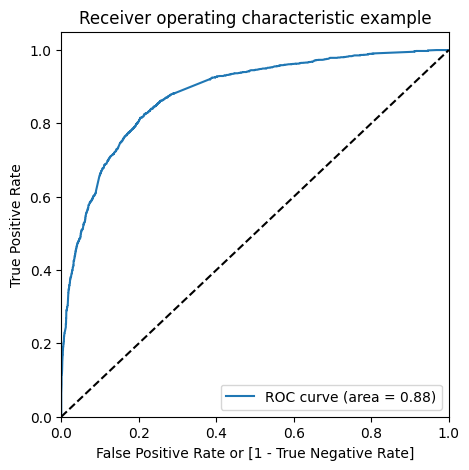

In [163]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred)

# 0.88 is pretty good 

Using Specificity and Senstivity to understand good cutoff value

In [166]:
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,1.0,0.981868,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0.0,0.582580,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,0.0,0.221674,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.256777,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.558815,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0


In [167]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.384566  1.000000  0.000000
0.05  0.05  0.437880  0.995837  0.089230
0.10  0.10  0.594781  0.966694  0.362383
0.15  0.15  0.699488  0.936719  0.551249
0.20  0.20  0.732629  0.922148  0.614204
0.25  0.25  0.784022  0.868859  0.731009
0.30  0.30  0.791867  0.846794  0.757544
0.35  0.35  0.803074  0.815570  0.795265
0.40  0.40  0.806436  0.773938  0.826743
0.45  0.45  0.808037  0.728560  0.857700
0.50  0.50  0.810279  0.696919  0.881113
0.55  0.55  0.808037  0.661532  0.899584
0.60  0.60  0.794428  0.585762  0.924818
0.65  0.65  0.787224  0.547877  0.936785
0.70  0.70  0.777458  0.502498  0.949272
0.75  0.75  0.770093  0.465862  0.960198
0.80  0.80  0.753762  0.408410  0.969563
0.85  0.85  0.740794  0.358868  0.979448
0.90  0.90  0.709094  0.263114  0.987773
0.95  0.95  0.682197  0.180266  0.995838


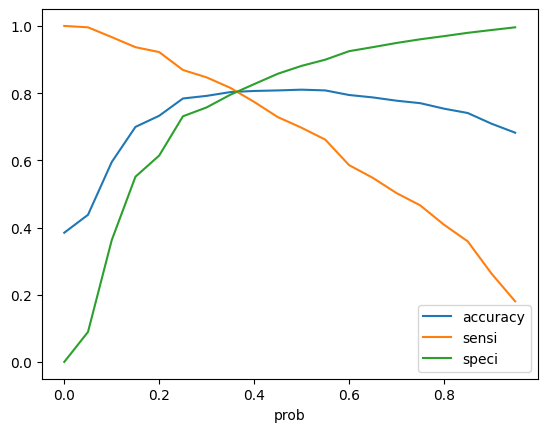

In [169]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# A cutoff around 0.3 and 0.4 seems the best
# Let's go with 0.35

In [170]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Pred.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Pred,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,1.0,0.981868,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0.0,0.582580,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2,0.0,0.221674,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.256777,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.558815,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1


Using Overall Accuracy as a metric

In [171]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.803073967339097

Using Confusion Matrix as a metric

In [172]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3057,  787],
       [ 443, 1959]])

Using Sensitivity as a metric

In [173]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted).ravel()

In [174]:
senstivity = tp / (tp + fn)
senstivity

0.8155703580349709

Using Specificity as a metric

In [175]:
specificity = tn / (tn+fp)
specificity

0.7952653485952134

### Predicting on Test Set

In [176]:
X_train_rfe.columns

Index(['Total Time Spent on Website', 'Lead_Origin__landing page submission',
       'Lead_Origin__lead import', 'Lead_Source__olark chat',
       'Lead_Source__reference', 'Lead_Source__welingak website',
       'Last_Activity__email bounced',
       'Last_Activity__olark chat conversation', 'Specialization__unstated',
       'What_occupation__working professional',
       'Last_Notable_Activity__others', 'Last_Notable_Activity__sms sent'],
      dtype='object')

In [177]:
df_test[numerical_columns] =  scaler.fit_transform(df_test[numerical_columns])

In [178]:
y_test = df_test.pop('Converted')
X_test = df_test

In [179]:
y_test = y_test.values.reshape(-1)

In [180]:
X_test_rfe = X_test[X_train_rfe.columns]

In [181]:
X_test_sm = sm.add_constant(X_test_rfe)

In [182]:
X_test_sm.head()

,const,Total Time Spent on Website,Lead_Origin__landing page submission,Lead_Origin__lead import,Lead_Source__olark chat,Lead_Source__reference,Lead_Source__welingak website,Last_Activity__email bounced,Last_Activity__olark chat conversation,Specialization__unstated,What_occupation__working professional,Last_Notable_Activity__others,Last_Notable_Activity__sms sent
4787,1.0,-0.429015,1,0,0,0,0,0,0,0,0,0,1
123,1.0,-0.794737,0,0,0,0,0,0,0,1,0,0,0
1011,1.0,-0.726048,0,0,0,0,0,0,0,1,0,0,0
1691,1.0,-0.757607,1,0,0,0,0,0,0,0,0,0,0
4385,1.0,0.651443,1,0,0,0,0,0,0,0,0,0,0


In [183]:
y_test_pred = lr4.predict(X_test_sm)

In [184]:
y_test_pred = y_test_pred.values.reshape(-1)

In [185]:
test_df = pd.DataFrame({'Converted': y_test, 'Converted_pred': y_test_pred})

In [186]:
test_df.head()

,Converted,Converted_pred
0,0.0,0.403731
1,0.0,0.080240
2,0.0,0.086067
3,0.0,0.087335
4,0.0,0.314718


In [187]:
test_df['final'] = test_df.Converted_pred.map(lambda x: 1 if x > 0.35 else 0)
test_df.head()

,Converted,Converted_pred,final
0,0.0,0.403731,1
1,0.0,0.080240,0
2,0.0,0.086067,0
3,0.0,0.087335,0
4,0.0,0.314718,0


Overall Accuracy on Test set

In [188]:
metrics.accuracy_score(test_df.Converted, test_df.final)

0.80134428678118

Confusion Matrix

In [189]:
confusion = metrics.confusion_matrix(test_df.Converted, test_df.final)
confusion

array([[1358,  353],
       [ 179,  788]])

Senstivity and Specificity

In [190]:
tn, fp, fn, tp = metrics.confusion_matrix(test_df.Converted, test_df.final).ravel()

In [191]:
senstivity = tp / (tp + fn)
senstivity

0.8148914167528438

In [192]:
specificity = tn / (tn+fp)
specificity

0.7936879018118059

### Precision-Recall Angle

In [193]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
# 'Predicted' was predicted using cutoff as 0.5
confusion

array([[3387,  457],
       [ 728, 1674]])

In [194]:
tn, fp, fn, tp = confusion.ravel()

In [195]:
senstivity = tp / (tp + fn)
senstivity

0.6969192339716903

In [196]:
specificity = tn / (tn+fp)
specificity

0.8811134235171696

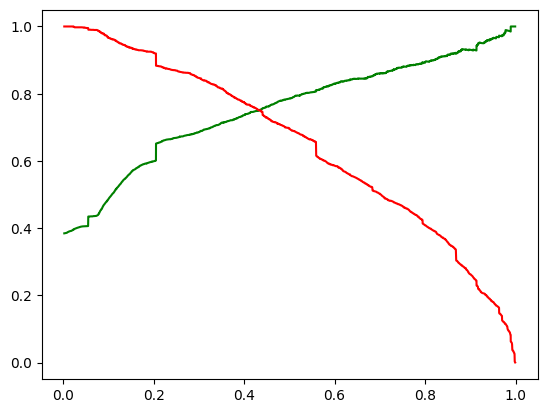

In [197]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()
# This one says 0.45 would be a better cutoff

In [198]:
y_train_pred_final['final_predicted2'] = y_train_pred_final.Conversion_Pred.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Conversion_Pred,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted,final_predicted2
0,1.0,0.981868,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0.0,0.582580,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
2,0.0,0.221674,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.256777,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.558815,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1


In [199]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted2)

0.8080371437720141

In [200]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted2)
confusion

array([[3297,  547],
       [ 652, 1750]])

In [201]:
tn, fp, fn, tp = confusion.ravel()

In [204]:
precision = tp/(tp+fp)
precision

0.761863299956465

In [209]:
recall = tp/(tp+fn)
recall

0.7285595337218984

### Predicting on Test Set

In [210]:
y_test_pred2 = lr4.predict(X_test_sm)

In [211]:
y_test_pred2 = y_test_pred2.values.reshape(-1)

In [212]:
test_df2 = pd.DataFrame({'Converted': y_test, 'Converted_pred': y_test_pred2})

In [213]:
test_df2.head()

,Converted,Converted_pred
0,0.0,0.403731
1,0.0,0.080240
2,0.0,0.086067
3,0.0,0.087335
4,0.0,0.314718


In [214]:
test_df2['final'] = test_df2.Converted_pred.map(lambda x: 1 if x > 0.4 else 0)
test_df2.head()

,Converted,Converted_pred,final
0,0.0,0.403731,1
1,0.0,0.080240,0
2,0.0,0.086067,0
3,0.0,0.087335,0
4,0.0,0.314718,0


In [215]:
metrics.accuracy_score(test_df2.Converted, test_df2.final)

0.8058252427184466

In [216]:
confusion = metrics.confusion_matrix(test_df2.Converted, test_df2.final)
confusion

array([[1400,  311],
       [ 209,  758]])

In [217]:
tn, fp, fn, tp = confusion.ravel()

In [218]:
precision = tp/(tp+fp)
precision

0.7090739008419084

In [219]:
recall = tp/(tp+fn)
recall

0.7838676318510859

--------------------------------------------------------------------------------------------------------------------

### Creating the get_score() function

As mentioned in the goals for this assignment.
This function would assign a score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [220]:
def get_score(X_train_rfe):
    return lr4.predict(sm.add_constant(X_train_rfe)) * 100

In [221]:
get_score(X_train_rfe)

6384    98.186801
3224    58.257957
2284    22.167376
5132    25.677659
2081    55.881523
          ...    
7683    97.368179
6891    10.134392
407     54.722566
8703     1.911754
1506    67.503452
Length: 6246, dtype: float64

--------------------------------------------------------------------------------------------------------------------